## Flight Fare Prediction

## Steps:

    1. Importing the dependencies
    2. Importing Dataset
    3. Data Preprocessing
    4. Exploratory Data Analysis(EDA)
    5. Handling Categorical Data
    6. Test Set
    7. Feature Selection
    8. Fitting Model Using Random Forest
    9. Website
    10. Deployment

## EDA

    1. Data Profiling
    2. Stastical analysis
    3.Graphical Analysis

## 1.0 Importing the dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## to display maximum columns of dataframe on screen
pd.pandas.set_option('display.max_columns', None)

## 2.0 Importing Dataset

1. As the data is in the form of excel file(.xlsx extension),we have to use pandas_excel to load the data.
2. Now we check complete information of data such as hidden values(null values in a row or column).
3. If null values are not present then we move further,and if present we can:

     a) impute data using impotation method in sklearn
     
     b) Fill NaN values  with mean ,median or mode using fillna() method.

In [4]:
## Importing data
train_data=pd.read_excel('D:\\Internship Project\\Flight Fare Prediction\\Data_Train.xlsx')

In [5]:
#getting first 5 rows from dataset
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [27]:
train_data.shape

(10683, 13)

## 2.1 Checking datatypes and null values

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Total_Stops       10682 non-null  object
 5   Additional_Info   10683 non-null  object
 6   Price             10683 non-null  int64 
 7   day_of_Journey    10683 non-null  int64 
 8   month_of_journey  10683 non-null  int64 
 9   dep_hr            10683 non-null  int64 
 10  dep_min           10683 non-null  int64 
 11  Arrival_hr        10683 non-null  int64 
 12  Arrival_min       10683 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.1+ MB


In [29]:
train_data.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Total_Stops         1
Additional_Info     0
Price               0
day_of_Journey      0
month_of_journey    0
dep_hr              0
dep_min             0
Arrival_hr          0
Arrival_min         0
dtype: int64

## Observation

    1. There are total 11 features and 10683 records.
    2. There are 4 datatime columns but there datatype is object.
    3. There are 6 categorical columns.
    4. The dependent feature is integer datatype and its name is Price.
    5. Only  two features have missing values,that can be dropped.

In [30]:
### Creating copy of dataset for data cleaning.
train_data1=train_data.copy()
train_data.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_journey,dep_hr,dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35


In [38]:
### dropping null values
### Now there is no null values in copied dataset.
train_data1.dropna(inplace=True)

## 2.2 Checking individual categories in each Categorical feature

In [32]:
### checking individual categories in each feature
for feature in [features for features in train_data.columns if features not in ['Date_of_Journey', 'Price', 'Arrival_Time','Dep_Time','Route']]:
    print(train_data[feature].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover         

## Observations

    1. There are 9 Service Provider companies namely IndiGo, Air India, Jet Airways, SpiceJet, Multiple carriers, GoAir,                Vistara, Air Asia, Trujet.
    2. Vistara Premium economy, Jet Airways Business and Multiple carriers Premium economy are special services given by these          companies.
    3. The dataset has 5 Source airports namely Banglore, Kolkata, Delhi,Chennai and Mumbai.
    4. The dataset has 6 Destination airports namely New Delhi, Banglore, Cochin, Kolkata, Delhi and Hyderabad.
    5.  There is total 5 different types of stops namely non-stop, 1 stop, 2 stops, 3 stops and 4 stops.
    6. There is total 10 different categories in additional info namely No info, In-flight meal not included, No check-in               baggage included, 1 Short layover, No Info, 1 Long layover, Change airports, Business class, Red-eye flight and  2 Long         layover.

## 2.3 Data Cleaning

In [6]:
### converting Date_of_journey to datetime and extracting day, month.
### since data is of single year hence not extracting year from date

train_data1['day_of_journey']=pd.to_datetime(train_data1['Date_of_Journey'], format='%d/%m/%Y').dt.day
train_data1['month_of_journey']=pd.to_datetime(train_data1['Date_of_Journey'], format='%d/%m/%Y').dt.month

NameError: name 'train_data1' is not defined

In [41]:
### droping original date of journey column

train_data1.drop(['Date_of_Journey'], axis=1, inplace=True)

KeyError: "['Date_of_Journey'] not found in axis"

In [7]:
### converting Dep_Time to datetime and extracting Dep_hour and Dep_min

train_data['dep_hr']=pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['dep_min']=pd.to_datetime(train_data['Dep_Time']).dt.minute

In [24]:
### dropping Dep_time Column

train_data.drop(['Dep_Time'], axis=1, inplace=True)

KeyError: "['Dep_Time'] not found in axis"

In [9]:
### Converting Arrival_Time to datetime and extraction Arrival_hr and Arrival_min

train_data['Arrival_hr']=pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min']=pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [10]:
### dropping Arrival_Time Column

train_data.drop(['Arrival_Time'], axis=1, inplace=True)

In [23]:
### replacing h and m with nothing in duration column

train_data['Duration']=data['Duration'].str.replace('h',"")
train_data['Duration']=data['Duration'].str.replace('m',"")

NameError: name 'data' is not defined

In [11]:
### creating Duration_hr and Duration_min column bu splitting duration column
train_data[['Duration_hr','Duration_min']] = train_data.Duration.str.split(" ",expand=True)

In [12]:
### replacing None values in mins column with zero
train_data.Duration_min.fillna(0, inplace=True)

In [22]:
### changing dataype from object to float
train_data['Duration_hr']=train_data['Duration_hr'].astype('float64')
train_data['Duration_min']=train_data['Duration_min'].astype('float64')

KeyError: 'Duration_hr'

In [15]:
### calculationg total duration in hrs
train_data['Total_duration']=round(train_data['Duration_hr']+(train_data['Duration_min']/60),2)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [16]:
### dropping Duration_hr and Duration_min feature
train_data.drop(['Duration_hr', 'Duration_min'], axis=1, inplace=True)

In [17]:
### dropping Duration column
train_data.drop(['Duration'], axis=1, inplace=True)

In [18]:
train_data['Total_Stops']=train_data['Total_Stops'].replace('non-stop','0')
train_data[['Total_Stops', 'drop_this']]=train_data.Total_Stops.str.split(" ", expand=True)

In [19]:
train_data['Total_Stops']=train_data['Total_Stops'].astype('int64')

ValueError: cannot convert float NaN to integer

In [20]:
train_data.drop('drop_this', axis=1, inplace=True)

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10683 non-null  object
 5   Total_Stops       10682 non-null  object
 6   Additional_Info   10683 non-null  object
 7   Price             10683 non-null  int64 
 8   day_of_journey    10683 non-null  int64 
 9   month_of_journey  10683 non-null  int64 
 10  dep_hr            10683 non-null  int64 
 11  dep_min           10683 non-null  int64 
 12  Arrival_hr        10683 non-null  int64 
 13  Arrival_min       10683 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.1+ MB


## Observations

    1.We have 5 categorical features.
    2.we have 9 numerical features

## 3.0 Categorical Features

## 3.1 Separating categorical features and listing count of unique categories in each feature

In [32]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes == 'O']
print("There are {} categorical features namely {}".format(len(categorical_features), categorical_features))

There are 5 categorical features namely ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [33]:
### unique categories in each categorical feature
for feature in categorical_features:
    print("The feature '{}' has '{}' number of unique categories.".format(feature, data[feature].nunique()))

The feature 'Airline' has '12' number of unique categories.
The feature 'Source' has '5' number of unique categories.
The feature 'Destination' has '6' number of unique categories.
The feature 'Route' has '128' number of unique categories.
The feature 'Additional_Info' has '10' number of unique categories.


## 3.2 Count of observations in each categories of categorical features

In [34]:
### Grouping Routes which are less than 1 percent of total Routes to other category for better visualisation of Route Feature
frequencies=data['Route'].value_counts(normalize=True)
mapping=data['Route'].map(frequencies)
data['Route']=data['Route'].mask(mapping<0.01, 'other_')
data['Route'].value_counts()

DEL → BOM → COK          2376
other_                   1720
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
DEL → BLR → COK           232
DEL → COK                 213
DEL → AMD → BOM → COK     205
DEL → MAA → COK           146
Name: Route, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'BLR → DEL'),
  Text(1, 0, 'other_'),
  Text(2, 0, 'CCU → BLR'),
  Text(3, 0, 'BLR → BOM → DEL'),
  Text(4, 0, 'DEL → BOM → COK'),
  Text(5, 0, 'DEL → BLR → COK'),
  Text(6, 0, 'MAA → CCU'),
  Text(7, 0, 'CCU → BOM → BLR'),
  Text(8, 0, 'DEL → AMD → BOM → COK'),
  Text(9, 0, 'DEL → HYD → COK'),
  Text(10, 0, 'DEL → COK'),
  Text(11, 0, 'CCU → DEL → BLR'),
  Text(12, 0, 'DEL → MAA → COK'),
  Text(13, 0, 'BOM → HYD'),
  Text(14, 0, 'DEL → JAI → BOM → COK')])

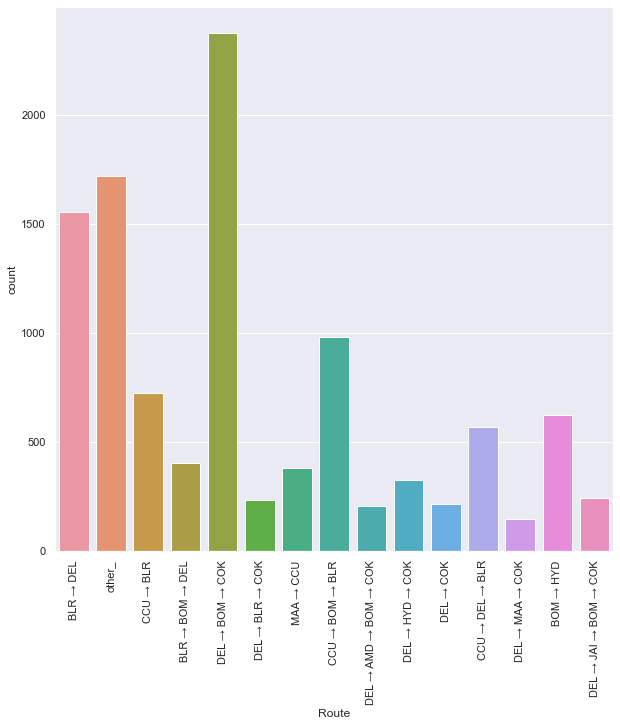

In [35]:
### Visualising Route feature saperately
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(data=data, x=data['Route'])
plt.xticks(rotation=90)

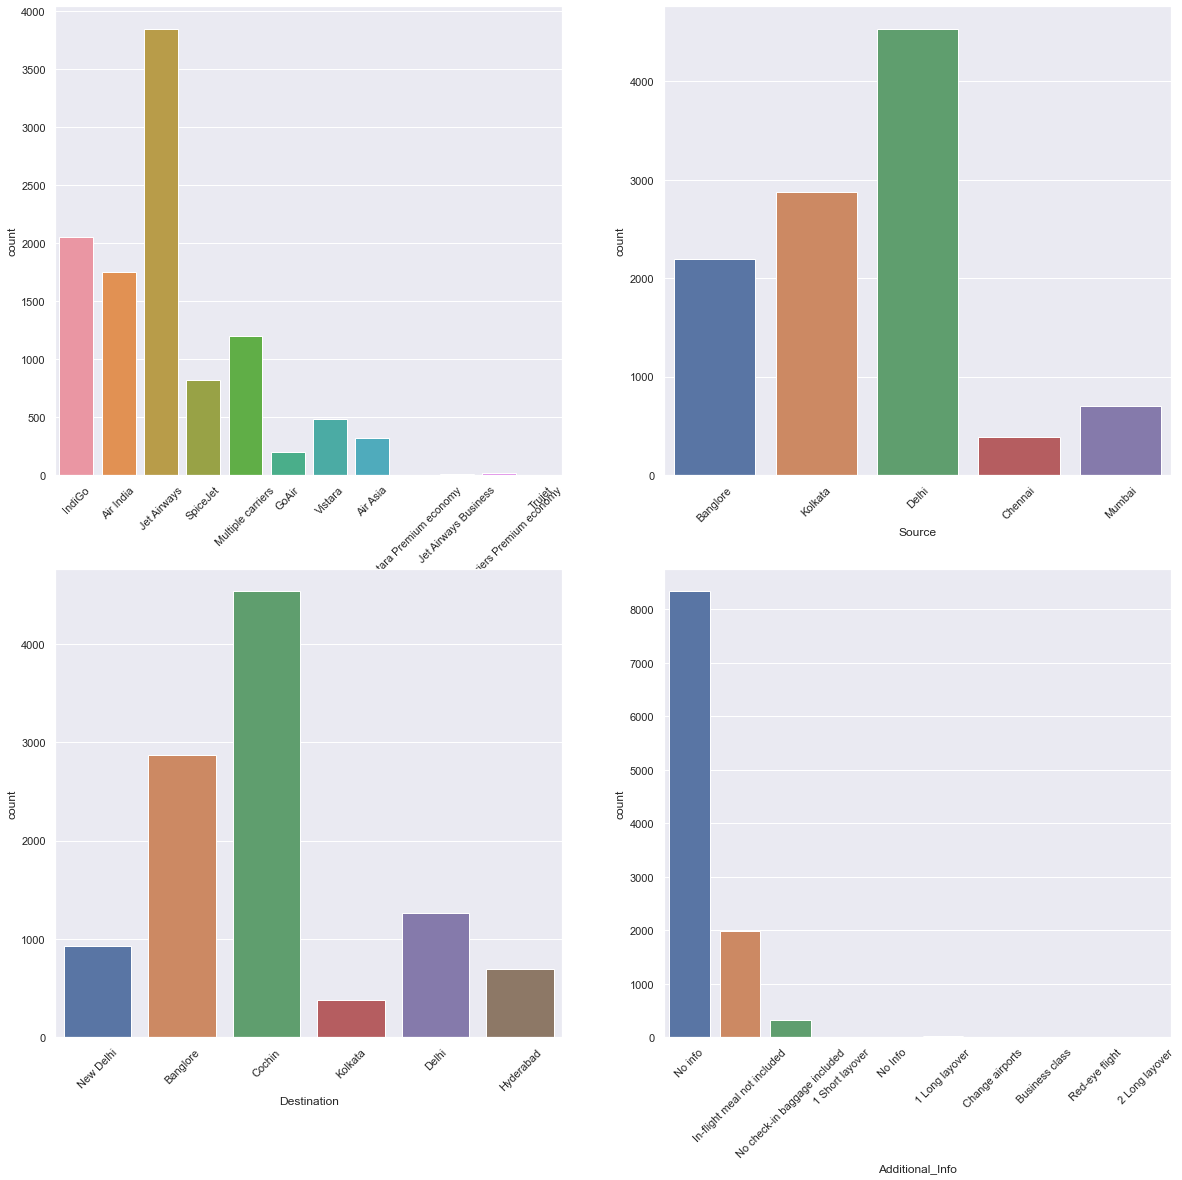

In [36]:
### excluding routes as it has more than 120 categories

plt.figure(figsize=(20,50))
for i in enumerate([feature for feature in categorical_features if feature !='Route']):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.countplot(data=data, x=i[1])
    plt.xticks(rotation=45)

## Observations

    1.DEL → BOM → COK is the most busiest route among all routes.
    2.BLR → DEL is second and CCU → BOM → BLR is third most busiest route.
    3.DEL → MAA → COK is least busiest route.
    4.Jet Airways have maximum number of flights followed by indigo and Air India.
    5.Trujet has least no of flights.
    6.Delhi has highest outgoing traffic of flights followed by kolkata and banglore.
    7.Chennai has least outgoing traffic of flights.
    8.Cochin has highest incoming traffic of flights followed by banglore and Delhi.
    9.Kolkata has least incoming traffic of flights.
    10.More than 8000 flights have no additional info.
    11.Additional info feature only has two categories with significant no of observations namely in-flight meal notincluded and        no check-in baggage included.

## 3.3 Comparing each Categorical feature with Price

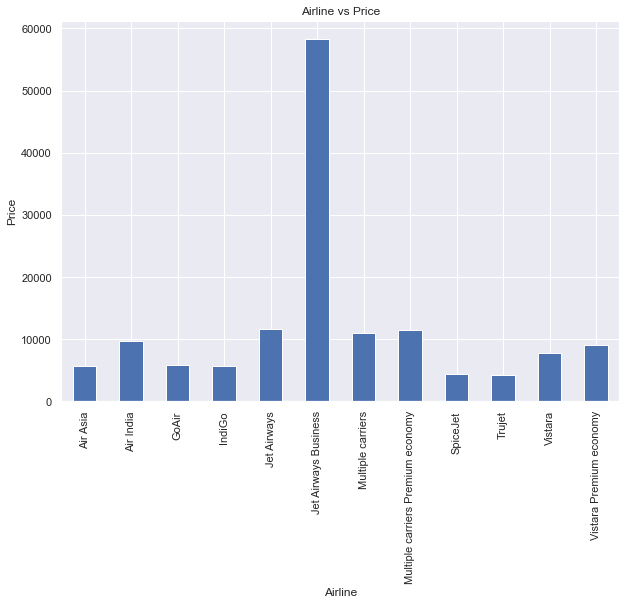

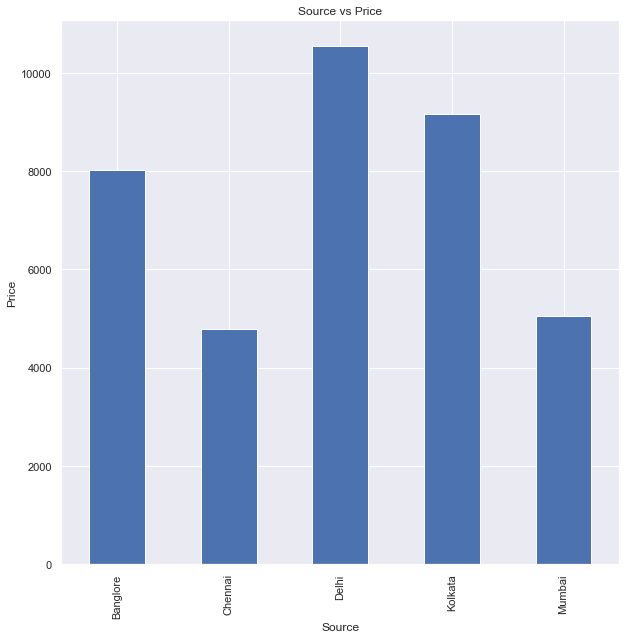

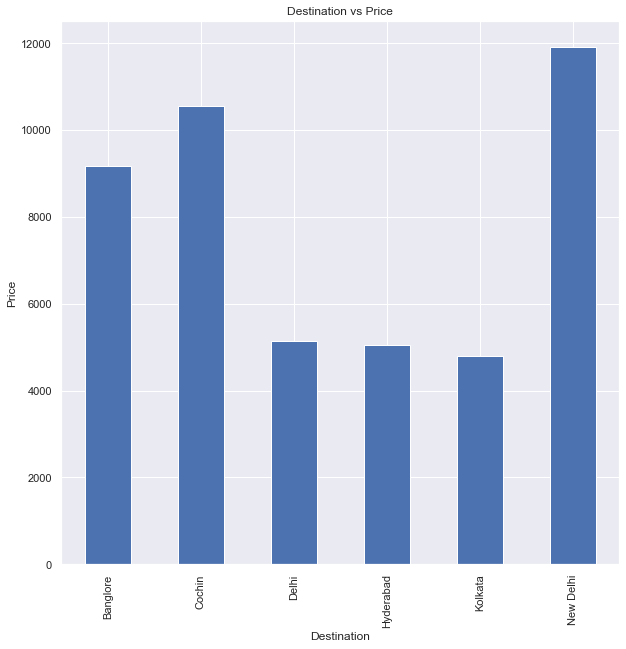

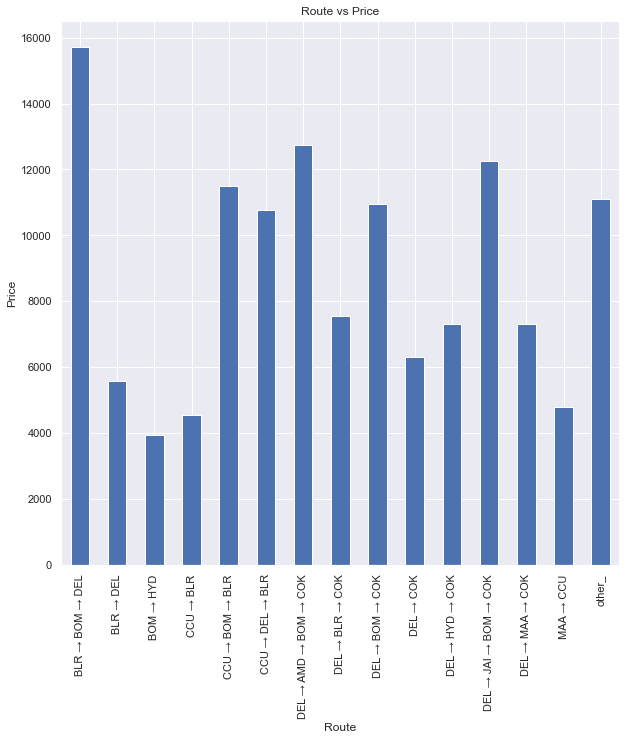

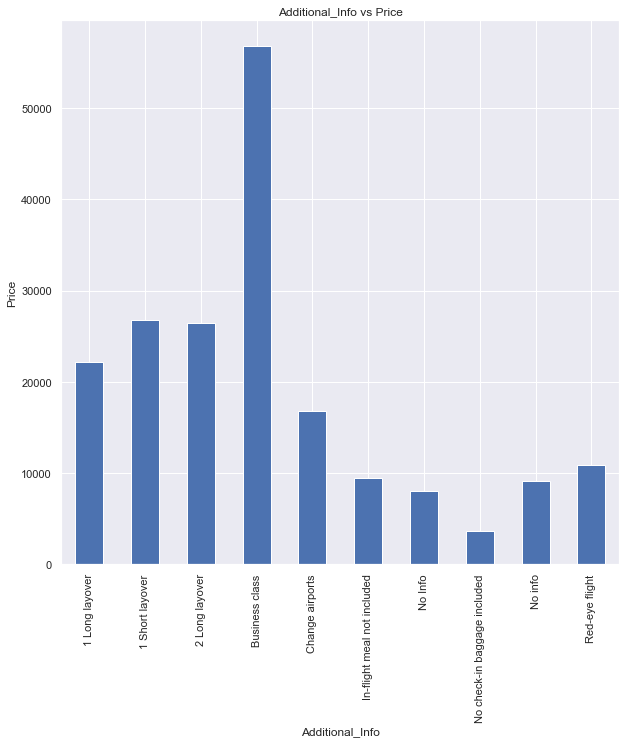

In [41]:
plt.figure(figsize=(10,7))
for feature in categorical_features:
    data.groupby(feature)['Price'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.xticks(rotation=90)
    plt.title("{} vs Price".format(feature))
    plt.show();

## Observations

    1. Jet Airways Business has highest average flight prices but since no of observations are less, hence it can be treated as       outlier.
    2. Jet Airways, Multiple carriers, Multiple carriers Premium economy, Air India, Vistara Premium economy have an average            flight prices around Rs.10,000
    3. Air Asia, GoAir, IndiGo has an average flight prices between 6000 to 7000 INR.
    4. SpiceJet and Trujet has least average flight prices among all service providers.
    5. Multiple carriers Premium economy, Jet Airways Business, Vistara Premium economy, Trujet has very less no of flights. So        these can be dropped.
    6.  Delhi has the highest average flight prices followed by Kolkata and banglore for flights having source in these cities.
    7. Chennai and Mumbai has the least average flight prices for flights having source in these cities.
    8. New Delhi has the highest average flight prices followed by Cochin and banglore for flights having destination in these          cities.
    9. Delhi, Hyderabad and Kolkata has the least average flight prices for flights having destination in these cities.
    10.BLR-BOM-DEL route has highest average flight price whereas BOM-HYD route has least average flight price.
    11.Flights with Business Class has highest average flight price.
    12.Flights with long and short layover has second highest average flight price.

## 3.4 Categorical feature vs outliers in Price

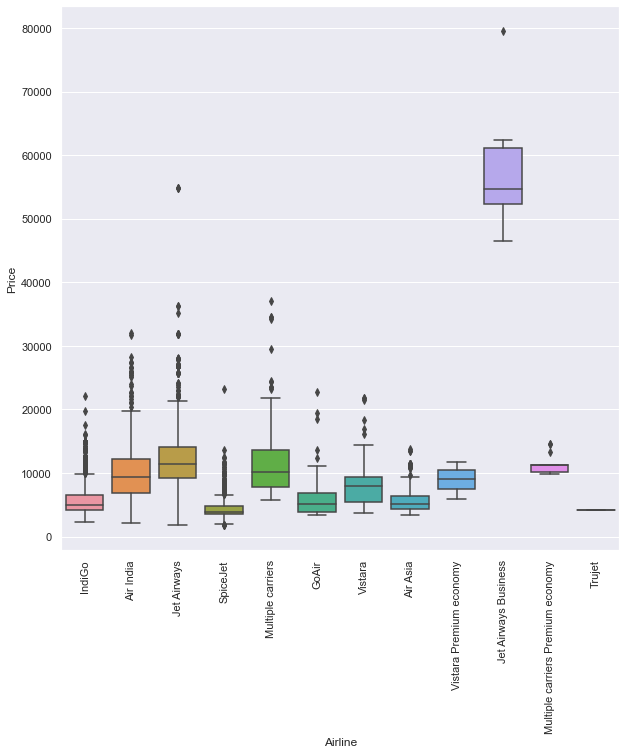

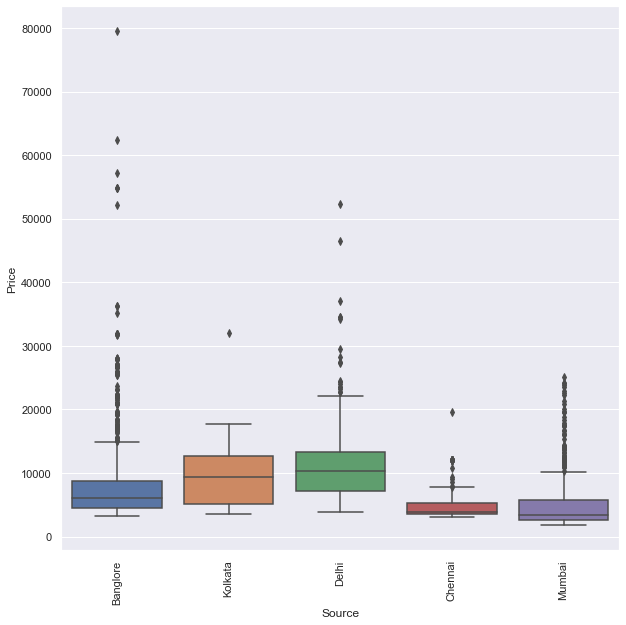

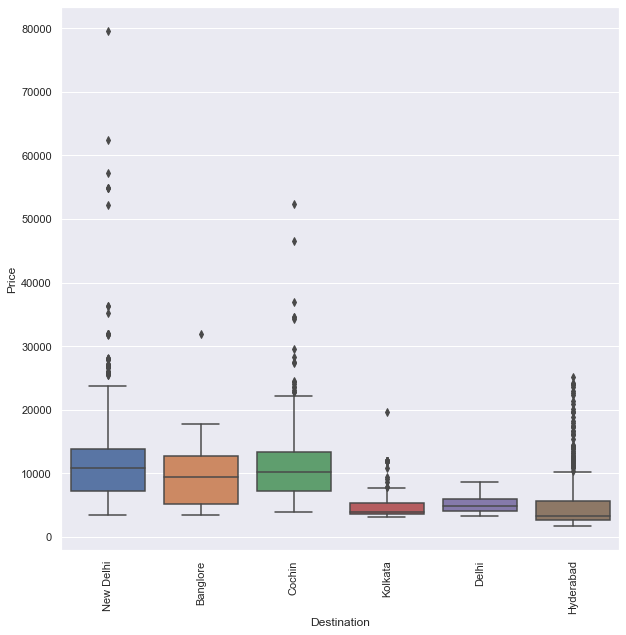

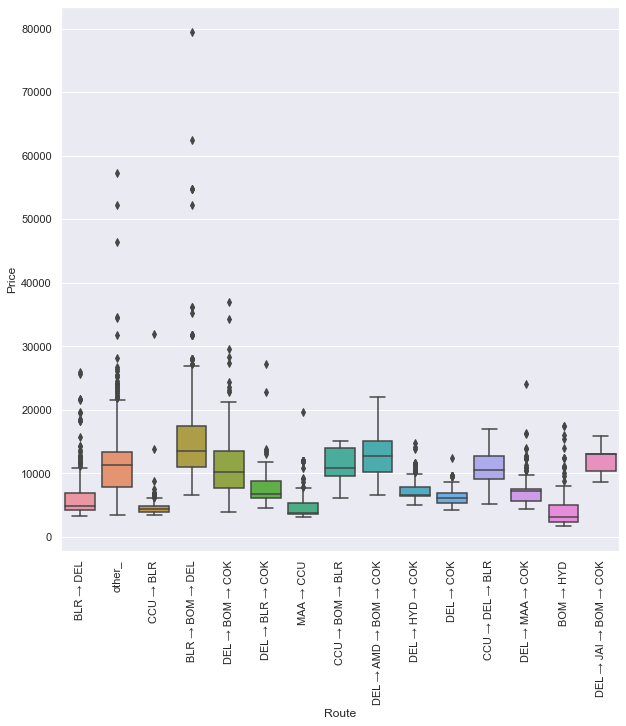

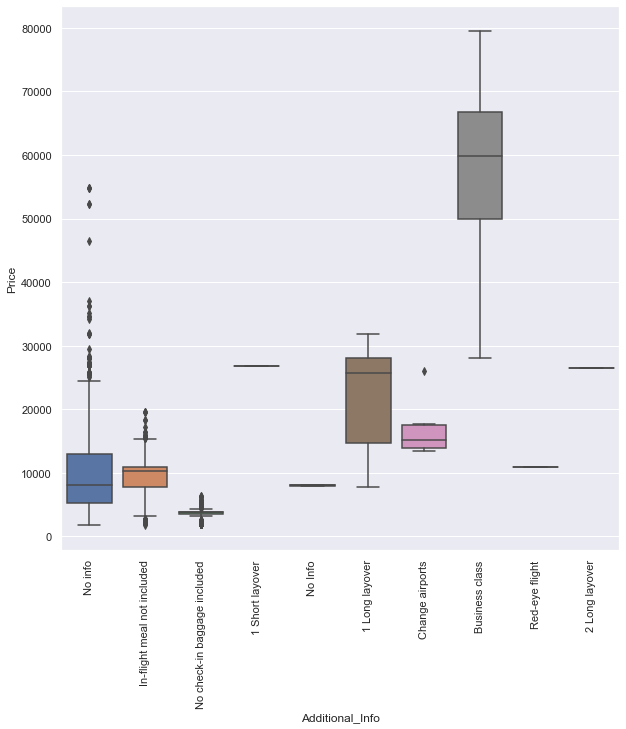

In [42]:
for feature in categorical_features: 
    sns.set(rc={'figure.figsize':(10,10)})
    sns.boxplot(x=data[feature],y='Price',data=data.sort_values('Price',ascending=False))
    plt.xticks(rotation=90)
    plt.show()

## Observations

    1. IndiGo, Air India, Jet Airways, and SpiceJet has large no. of outliers in flight prices.
    2. Multiple carriers, GoAir, Vistara has comparatively less no. of outliers in flight prices.
    3. Source of flight cities banglore, delhi, chennai and mumbai has large no. of outliers in flight prices whereas 
       kolkata has least no. of outliers in flight prices.
    4. Destination of flight cities new delhi, cochin, hyderabad and kolkata has large no. of outliers in flight prices 
       whereas banglore and delhi has least no. of outliers in flight prices.
    5. BOM → HYD, DEL → MAA → COK, DEL → BOM → COK, BLR → BOM → DEL, and BLR → DEL routes has large no. of outliers in 
       flight prices whereas DEL → AMD → BOM → COK, MAA → CCU, DEL → JAI → BOM → COK, and CCU → DEL → BLR has zero no. of              outliers in flight prices.
    6.Additional info categories No check-in baggage included, No info, and In-flight meal not includedhas large no. of outliers       in flight prices whereas Business class and 1 Long layover has zero no. of outliers in flight prices.

## 4.0 Numerical Features

## 4.1 Numerical features and unique values

In [44]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes!='O']
print("There are {} no of numerical features namely {}".format(len(numerical_features), numerical_features))

There are 9 no of numerical features namely ['Total_Stops', 'Price', 'day_of_journey', 'month_of_journey', 'dep_hr', 'dep_min', 'Arrival_hr', 'Arrival_min', 'Total_duration']


In [45]:
for feature in numerical_features:
    print("There are {} unique values in {} feature".format(data[feature].nunique(), feature))

There are 5 unique values in Total_Stops feature
There are 1870 unique values in Price feature
There are 10 unique values in day_of_journey feature
There are 4 unique values in month_of_journey feature
There are 24 unique values in dep_hr feature
There are 12 unique values in dep_min feature
There are 24 unique values in Arrival_hr feature
There are 12 unique values in Arrival_min feature
There are 367 unique values in Total_duration feature


## 4.2 Discreate features and its unique values

In [46]:
### discreate features (the features having less than 25 distinct/unique values is considered)

discreate_features=[feature for feature in numerical_features if data[feature].nunique()<25]
for feature in discreate_features:
    print("No. of unique categories in {} are {} namely {}".format(feature, data[feature].nunique(), 
                                                                   sorted(data[feature].unique())))

No. of unique categories in Total_Stops are 5 namely [0, 1, 2, 3, 4]
No. of unique categories in day_of_journey are 10 namely [1, 3, 6, 9, 12, 15, 18, 21, 24, 27]
No. of unique categories in month_of_journey are 4 namely [3, 4, 5, 6]
No. of unique categories in dep_hr are 24 namely [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
No. of unique categories in dep_min are 12 namely [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
No. of unique categories in Arrival_hr are 24 namely [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
No. of unique categories in Arrival_min are 12 namely [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]


## 4.3 Continuous features

In [47]:
### continuous features
continuous_feature=[feature for feature in numerical_features if feature not in discreate_features]
print("There are {} no of Continuous features namely {}".format(len(continuous_feature), continuous_feature))

There are 2 no of Continuous features namely ['Price', 'Total_duration']


## 4.4 Visualising discrete features

## 4.4.1 Count of distinct values for each discrete feature

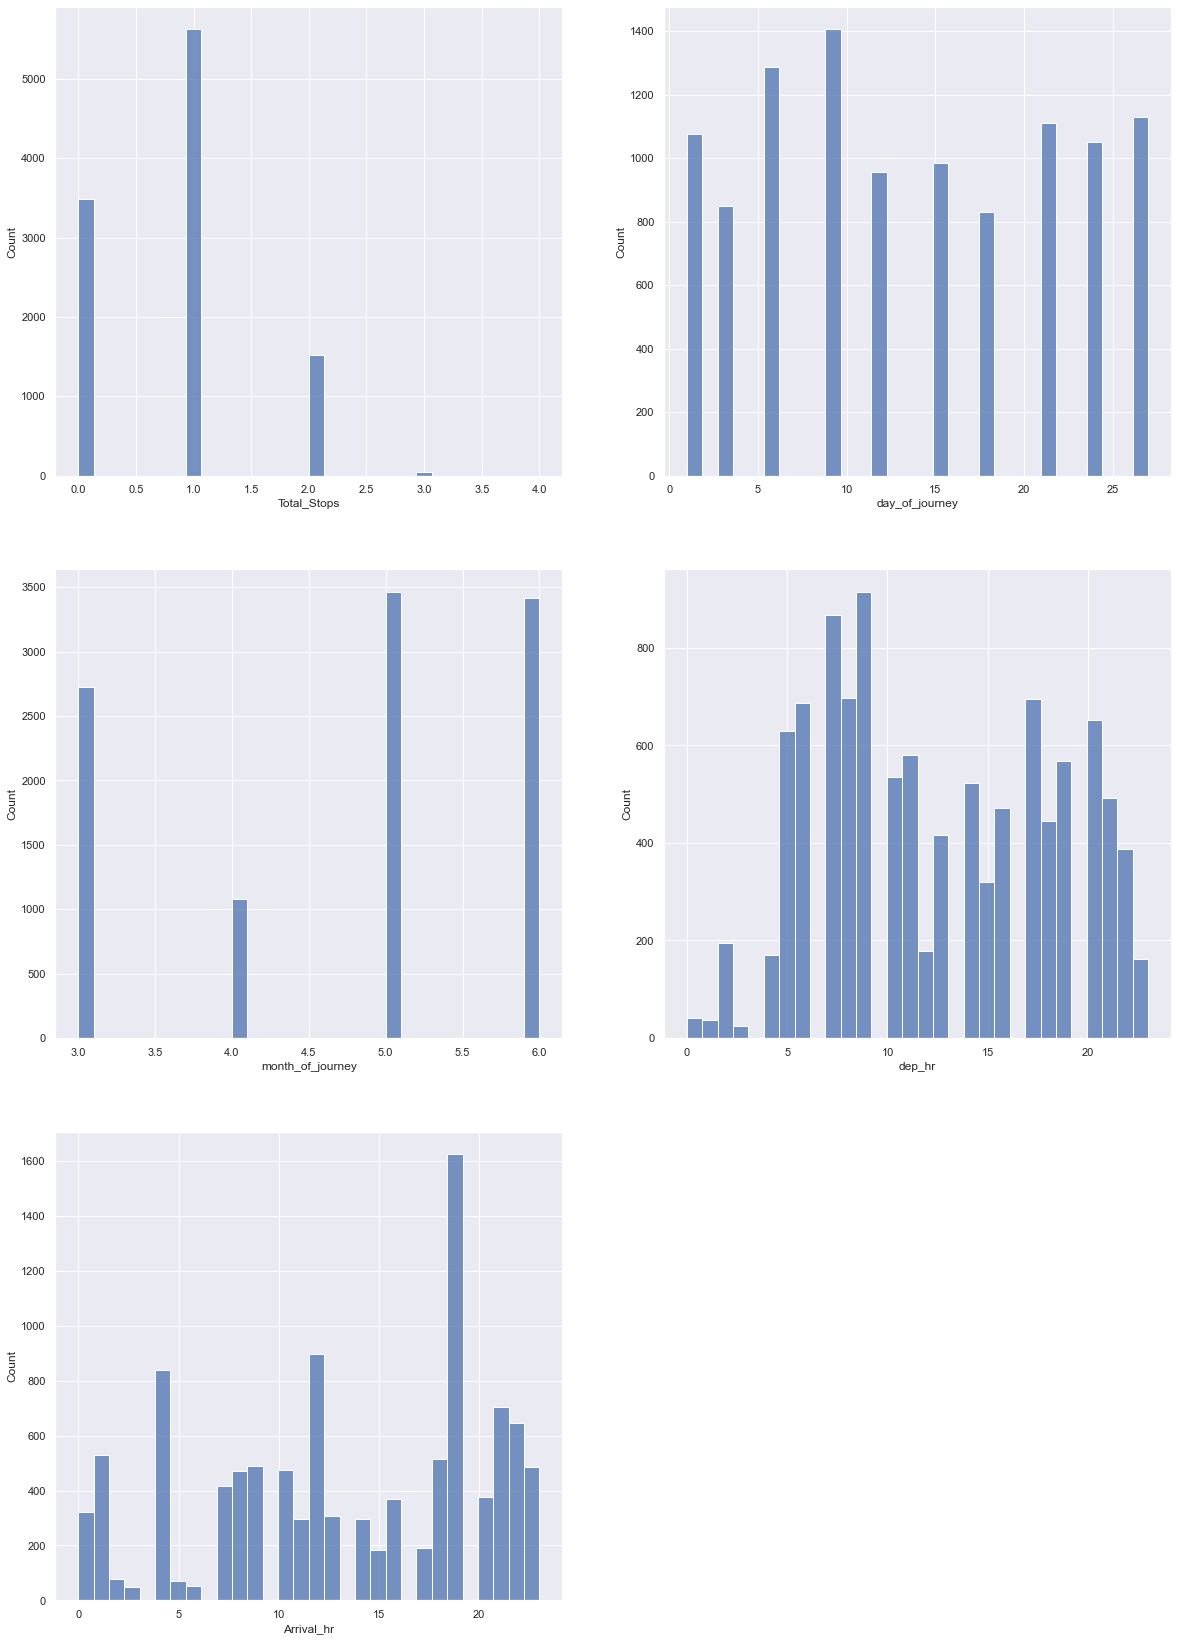

In [48]:
### discreate features excluding dep_min and Arrival_min as these feature seprately has no significance.


plt.figure(figsize=(20,50))
for i in enumerate([feature for feature in discreate_features if feature not in ['dep_min', 'Arrival_min']]):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.histplot(data=data, x=i[1], bins=30)
    plt.xlabel(i[1])

## Observations

    1. Maximum flights have 1 stop between source and destination airport followed by no-stop and 2 stops.
    2. 4 stops between source and destination airport has least no. of flights
    3. All days of month have almost same no. of flights.
    4. May and June have highest no. of flights followed by March.
    5. April has least no. of flights. 6.Morning 6 AM to 10 AM and Evening 5 PM to 8 PM has more traffic of outgoing flights.
    6. 6 PMhas highest no. of incoming of flights whereas 4 AMhas least no. of incoming flights.

## 4.4.2 Comparing Prices of each Airline with each discrete feature

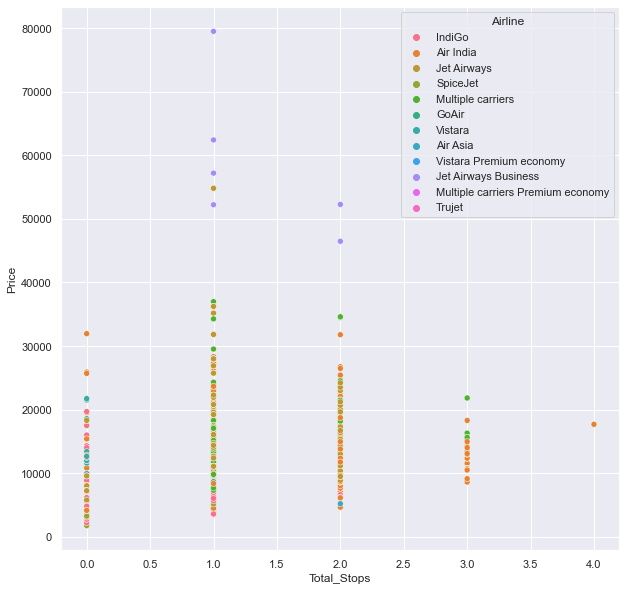

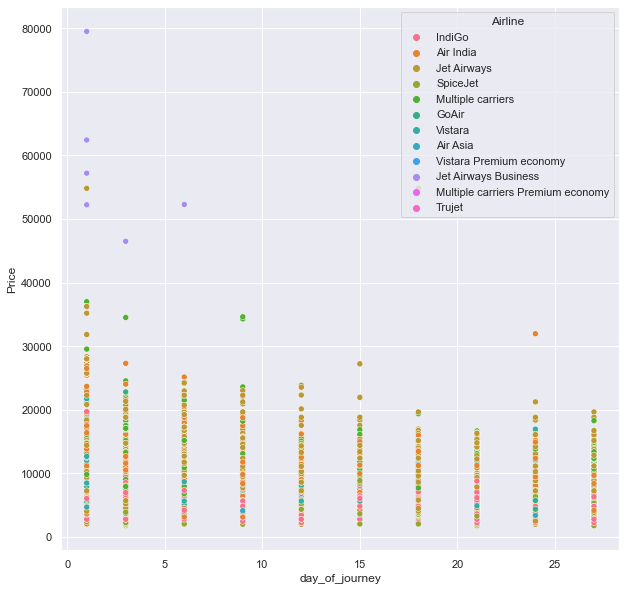

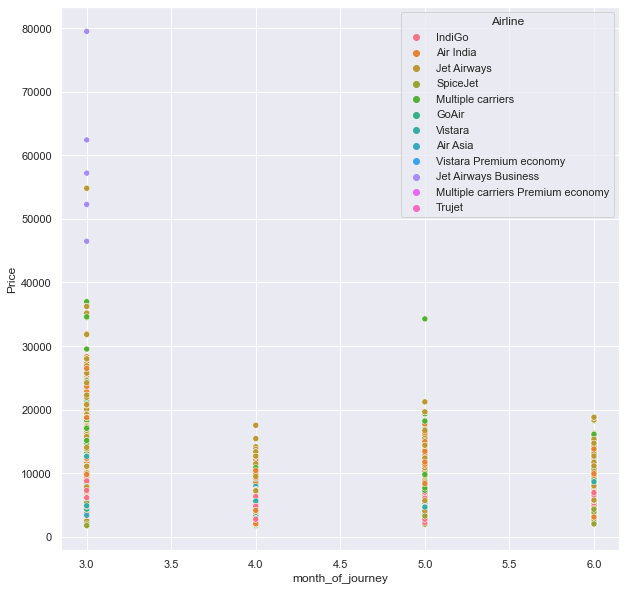

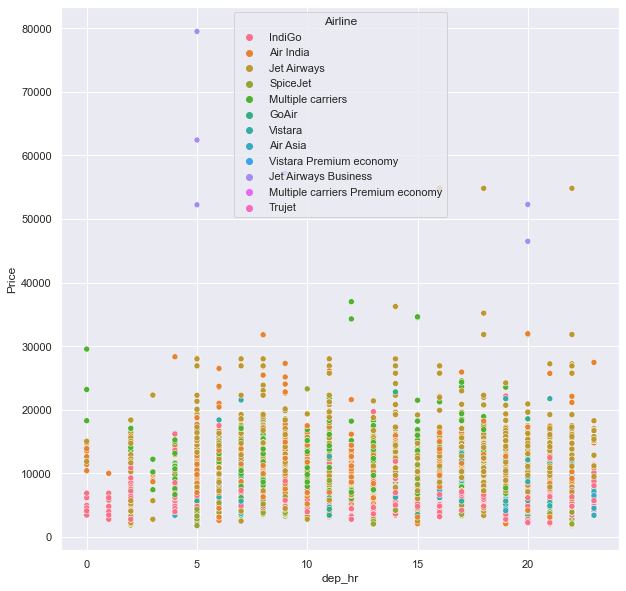

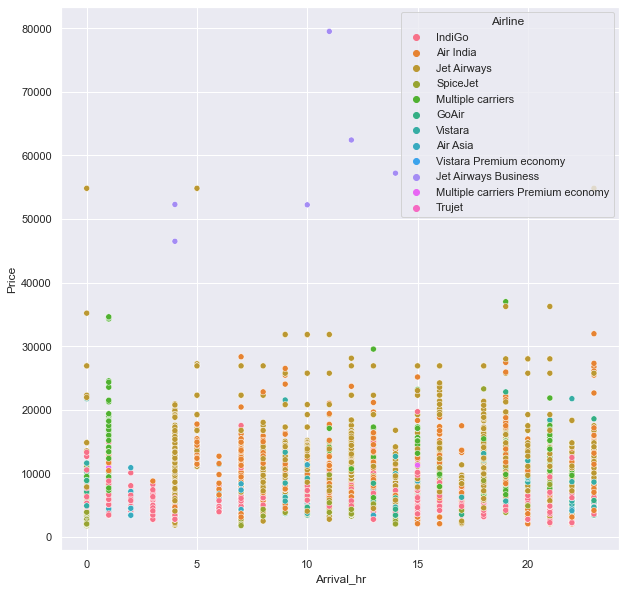

In [49]:
for feature in [feature for feature in discreate_features if feature not in ['dep_min', 'Arrival_min']]:
    sns.scatterplot(data=data, x=data[feature], y=data['Price'], hue=data['Airline'])
    plt.show()

## Observations

    1. All flights with 0,1,2,3, and 4 Stops have price less than 30,000 INR with exception being Jet airways and Jet airways Business 1 and 2 stops.
    2. 1st of month have Highest flight price and rest all days have almost similar range of flight price.
    3. Month of March has highest flight prices, rest all months have similar flight prices with max being 30,000 INR.
    4. All Departure hour have similar flight price ranges with outliers in flight prices.
    5. All Arrival hour have similar flight price ranges with outliers in flight prices.

## 4.4.3 Comparing Prices of flight with each discrete feature

## Data Preprocessing

In [52]:
#data type of any column(Date_of_Journey)
print(train_data.Date_of_Journey.dtype)

#data type of any column(Arrival_Time)
print(train_data.Arrival_Time.dtype)

#data type of any column(Dep_Time)
print(train_data.Dep_Time.dtype)

#data type of any column(Duration)
print(train_data.Duration.dtype)

object
object
object
object


In [59]:
#number of rows and columns in a dataset
train_data.shape

(10682, 11)

In [54]:
#information of data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [56]:
#checking number of missing values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [58]:
#statistical analysis(description)
train_data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [55]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [23]:
#Route--> null values=1 and Total_Stops--> null values=1, so we can ignore them

train_data.dropna(inplace=True)

In [24]:
#now check again
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [20]:
#number of rows and columns in a dataset
train_data.shape

(10682, 11)

In [25]:
#statistical analysis(description)
train_data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [60]:
#checking distribution of categorical data
print(train_data.Airline.value_counts(),"\n")
print(train_data.Source.value_counts(),"\n")
print(train_data.Destination.value_counts(),"\n")
print(train_data.Total_Stops.value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64 

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64 

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


## Exploratory Data Analysis (EDA)

1. From description of data, we can see that 'Date_of_Journey', 'Arrival_Time', 'Dep_Time' is of 'object' datatype, so we have to convert these into 'datetime' datatype so as to use this coloumn property for prediction.

2. For converting into 'datetime' datatype, we use pandas to_datetime

"Date_of_Journey" into  datetime:

    1. .'dt.day' will extract only 'day','.dt.month' will extract only 'month' and '.dt.year' will extract only 'year'

In [61]:
#converting to 'datetime'
train_data['Date_of_Journey'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y')
#read first five rows
train_data.head()
#check type of coloumn(Date_of_Journey)
print(train_data.Date_of_Journey.dtype)

datetime64[ns]


In [29]:
#adding new columns(Journey_day, Journey_month, Journey_year) out of column(Date_of_Journey)

#extracting day
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day

#extracting month
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month

#extracting year
#train_data['Journey_year'] = train_data['Date_of_Journey'].dt.year

#print first 5 rows
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [62]:
#drop column 'Date_of_Journey' as it's of no use now
train_data.drop(['Date_of_Journey'], axis=1, inplace=True)



In [63]:
#print first 5 rows
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


"Arrival_Time" and "Dep_Time" into datatime:

    1.  Arrival time is when the plane pulls up to the gate.
    2.  Departure time is when a plane leaves the gate.
    3. '.dt.hour' will extract only 'hour', '.dt.minute' will extract only 'minute' and '.dt.second' will extract only 'second'.

In [64]:
#converting 'Arrival_Time' to 'datetime'
train_data['Arrival_Time'] = pd.to_datetime(train_data.Arrival_Time)
#read first five rows
train_data.head()
#check type of coloumn(Arrival_Time)
print(train_data.Arrival_Time.dtype)

datetime64[ns]


In [65]:
#adding new columns(Arrival_hour, Arrival_minute)

#extracting Arrival hour
train_data['Arrival_hour'] = train_data['Arrival_Time'].dt.hour
#extracting Arrival minute
train_data['Arrival_minute'] = train_data['Arrival_Time'].dt.minute

#print first 5 rows
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2022-10-17 13:15:00,7h 25m,2 stops,No info,7662,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2022-06-10 04:25:00,19h,2 stops,No info,13882,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2022-10-17 23:30:00,5h 25m,1 stop,No info,6218,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2022-10-17 21:35:00,4h 45m,1 stop,No info,13302,21,35


In [ ]:
#drop column 'Arrival_Time' as it's of no use now
train_data.drop(['Arrival_Time'], axis=1, inplace=True)

#print first 5 rows
train_data.head()

In [35]:
#converting 'Dep_Time' to 'datetime'
train_data['Dep_Time'] = pd.to_datetime(train_data.Dep_Time)
#read first five rows
train_data.head()
#check type of coloumn(Arrival_Time)
print(train_data.Dep_Time.dtype)

datetime64[ns]


In [67]:
#adding new columns(Arrival_hour, Arrival_minute)

#extracting Arrival hour
train_data['Arrival_hour'] = train_data['Arrival_Time'].dt.hour
#extracting Arrival minute
train_data['Arrival_minute'] = train_data['Arrival_Time'].dt.minute

#print first 5 rows
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2022-10-17 13:15:00,7h 25m,2 stops,No info,7662,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2022-06-10 04:25:00,19h,2 stops,No info,13882,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2022-10-17 23:30:00,5h 25m,1 stop,No info,6218,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2022-10-17 21:35:00,4h 45m,1 stop,No info,13302,21,35


In [68]:
#drop column 'Arrival_Time' as it's of no use now
train_data.drop(['Arrival_Time'], axis=1, inplace=True)

#print first 5 rows
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,21,35


In [69]:


# 'Duration'--> Time taken by plane to reach destination.
# It is the differnce between Departure time and Arrival time


# Assigning and converting Duration column into list to extract values one-by-one in for-loop
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [70]:
#adding columns 'Duration_hours' and 'Duration_minutes' into dataset 'train_data'
train_data['Duration_hours'] = duration_hours
train_data['Duration_minutes'] = duration_mins

#get first 5 rows
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,21,35,4,45


In [72]:
#drop column 'Duration' as it's of no use now
train_data.drop(['Duration'], axis=1, inplace=True)

#get first 5 rows 
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,non-stop,No info,3897,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,No info,13882,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,No info,6218,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,No info,13302,21,35,4,45


## Handling Categorical Data 

There are many ways to handle Categorical Data, some of them are:

    1. 'LabelEncoder'--> for handling Ordinal Data (means, data which is in order)
     2. 'OneHotEncoder'--> for handling Nominal Data (means, data which is not in order)

In [73]:
#checking distribution of categorical data(Airline)
print(train_data.Airline.value_counts(),"\n")

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 



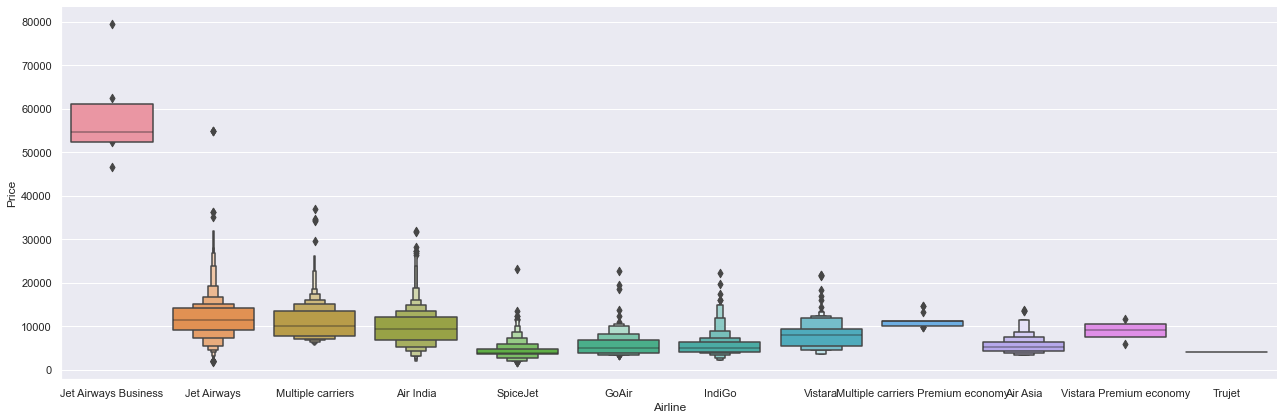

In [74]:
#Graph of Airline vs Price
sns.catplot(y='Price', x='Airline', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

# From graph we can see that 'Jet Airways Business' have the highest Price.
# Apart from the first Airline almost all are having similar 'median'.

In [11]:
#As Airline--> Nominal Categorical Data, so we perform 'OneHotEncoding'

#make a dataframe named 'Airline'
Airline = train_data['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)
#get first 5 rows of Airline
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [12]:
#checking distribution of categorical data(Source)
print(train_data.Source.value_counts(),"\n")

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64 



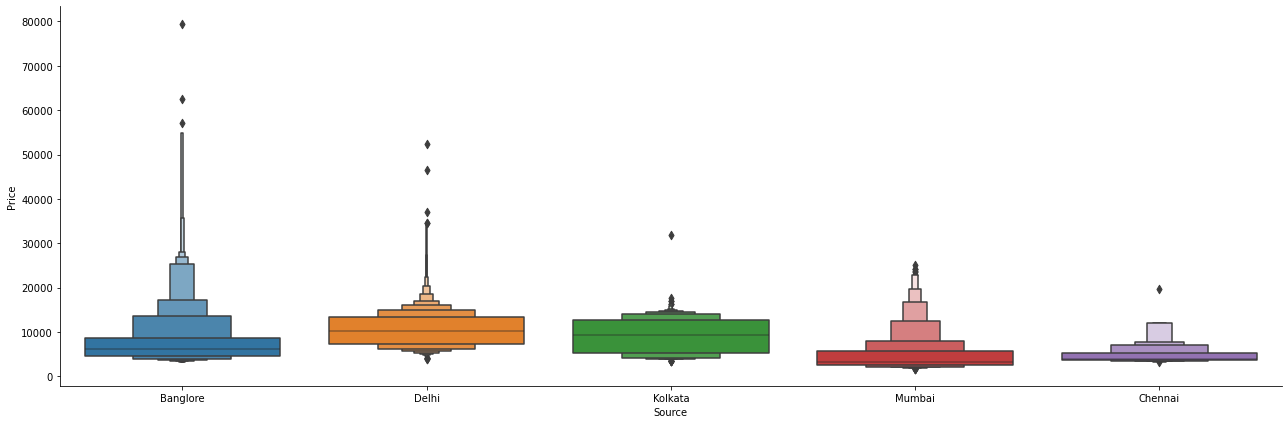

In [13]:
#Graph of Source vs Price
sns.catplot(y='Price', x='Source', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [14]:
#As Source--> Nominal Categorical Data, so we perform 'OneHotEncoding'

#make a dataframe named 'Source'
Source = train_data['Source']
Source = pd.get_dummies(Source, drop_first=True)
#get first 5 rows of Source
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [15]:
#checking distribution of categorical data(Destination)
print(train_data.Destination.value_counts(),"\n")

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64 



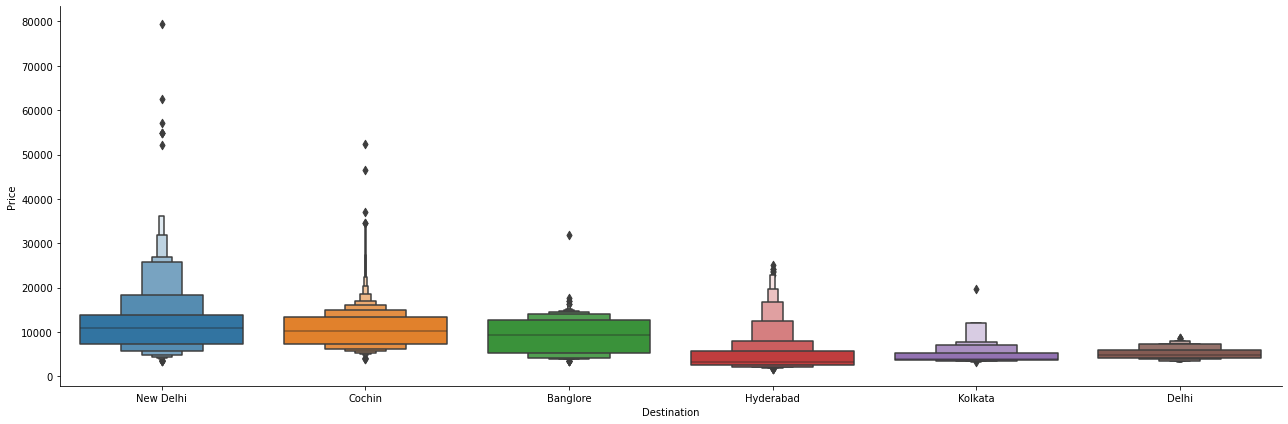

In [16]:
#Graph of Destination vs Price
sns.catplot(y='Price', x='Destination', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [17]:
#As Destination--> Nominal Categorical Data, so we perform 'OneHotEncoding'

#***********************why not banglore

#make a dataframe named 'Destination'
Destination = train_data['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)
#get first 5 rows of Destination
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [18]:
#checking distribution of categorical data(Route)
train_data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [19]:
#as 'Total_Stops' and 'Route' are related(dependent on) to each other, so we can drop 'Route'.
train_data.drop(['Route'], axis=1, inplace=True)

In [20]:
#get first 5 rows
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [21]:
#checking distribution of categorical data(Total_Stops)
print(train_data.Total_Stops.value_counts(),"\n")

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64 



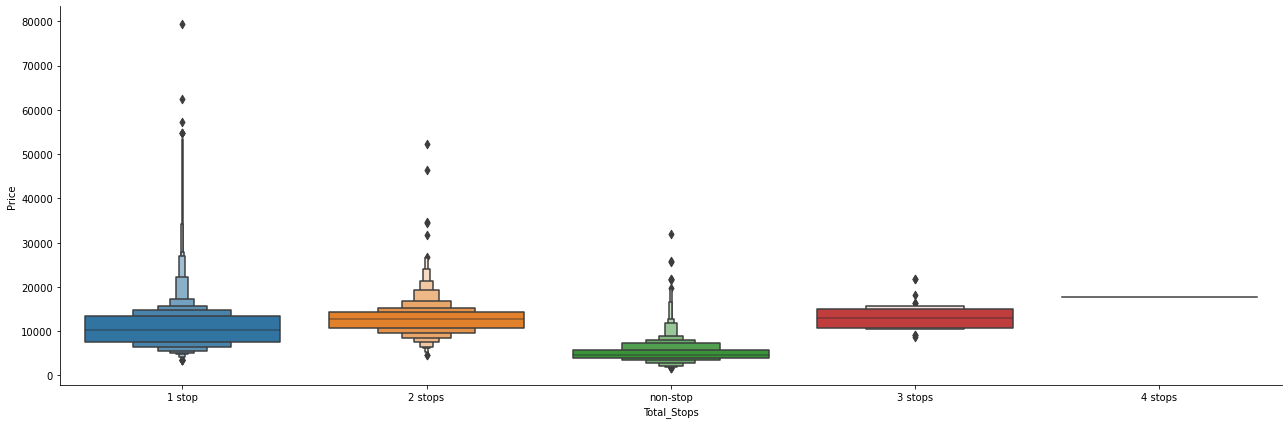

In [22]:
#Graph of Total_Stops vs Price
sns.catplot(y='Price', x='Total_Stops', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [87]:
#As Total_Stops --> Ordinal Categorical Data, so we perform 'LabelEncoding'
#we assign values in 'Total_Stops' with corresponding keys.
train_data.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
train_data.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,22:20,0,No info,3897,1,10,2,50
1,Air India,Kolkata,Banglore,05:50,2,No info,7662,13,15,7,25
2,Jet Airways,Delhi,Cochin,09:25,2,No info,13882,4,25,19,0
3,IndiGo,Kolkata,Banglore,18:05,1,No info,6218,23,30,5,25
4,IndiGo,Banglore,New Delhi,16:50,1,No info,13302,21,35,4,45


In [88]:
#checking distribution of categorical data(Additional_Info)
print(train_data.Additional_Info.value_counts(),"\n")

#as 80% of information in 'Additional_Info' is 'No info', hence we can drop this column
train_data.drop(['Additional_Info'], axis=1, inplace=True)

#get first 5 rows
train_data.head()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64 



,Airline,Source,Destination,Dep_Time,Total_Stops,Price,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,22:20,0,3897,1,10,2,50
1,Air India,Kolkata,Banglore,05:50,2,7662,13,15,7,25
2,Jet Airways,Delhi,Cochin,09:25,2,13882,4,25,19,0
3,IndiGo,Kolkata,Banglore,18:05,1,6218,23,30,5,25
4,IndiGo,Banglore,New Delhi,16:50,1,13302,21,35,4,45


In [23]:
#conactenate dataframe--> (train_data, Airline, Source, Destination)
train_data1 = pd.concat([train_data, Airline, Source, Destination], axis=1)

#print first 5 rows
train_data1.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
#drop columns 'Airline, Source, Destination' as these are now of no further use
train_data1.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)
#print first 5 rows
train_data1.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,05:50,13:15,7h 25m,2 stops,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,09:25,04:25 10 Jun,19h,2 stops,No info,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,18:05,23:30,5h 25m,1 stop,No info,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,16:50,21:35,4h 45m,1 stop,No info,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
#shape of dataframe 'train_data'
train_data1.shape

(10683, 27)

## Test Data

In [92]:
# All steps as in 'Training Set' (its done separately so as to overcome 'data leakage')

#IMPORTING DATASET

#importing data
test_data = pd.read_excel("D:\\Internship Project\\Flight Fare Prediction\\Test_set.xlsx")

#********************************************************************

#DATA PREPROCESSING

#number of rows and columns in a dataset
test_data.shape

#checking number of missing values
test_data.isnull().sum()

#Route--> null values=1 and Total_Stops--> null values=1, so we can ignore them
test_data.dropna(inplace=True)
#now check again
test_data.isnull().sum()

#statistical analysis(description)
test_data.describe()

#********************************************************************

#EXPLORATORY DATA ANALYSIS

#converting to 'datetime'
test_data['Date_of_Journey'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y')

#adding new columns(Journey_day, Journey_month, Journey_year) out of column(Date_of_Journey)
#extracting day
test_data['Journey_day'] = test_data['Date_of_Journey'].dt.day
#extracting month
test_data['Journey_month'] = test_data['Date_of_Journey'].dt.month

#drop column 'Date_of_Journey' as it's of no use now
test_data.drop(['Date_of_Journey'], axis=1, inplace=True)

#converting 'Arrival_Time' to 'datetime'
test_data['Arrival_Time'] = pd.to_datetime(test_data.Arrival_Time)

#adding new columns(Arrival_hour, Arrival_minute)
#extracting Arrival hour
test_data['Arrival_hour'] = test_data['Arrival_Time'].dt.hour
#extracting Arrival minute
test_data['Arrival_minute'] = test_data['Arrival_Time'].dt.minute

#drop column 'Arrival_Time' as it's of no use now
test_data.drop(['Arrival_Time'], axis=1, inplace=True)

#converting 'Dep_Time' to 'datetime'
test_data['Dep_Time'] = pd.to_datetime(test_data.Dep_Time)

#adding new columns(Dep_hour, Dep_minute)
#extracting Depature hour
test_data['Dep_hour'] = test_data['Dep_Time'].dt.hour
#extracting Departure minute
test_data['Dep_minute'] = test_data['Dep_Time'].dt.minute

#drop column 'Dep_Time' as it's of no use now
test_data.drop(['Dep_Time'], axis=1, inplace=True)

# 'Duration'--> Time taken by plane to reach destination.
# It is the differnce between Departure time and Arrival time

# Assigning and converting Duration column into list to extract values one-by-one in for-loop
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
#adding columns 'Duration_hours' and 'Duration_minutes' into dataset 'train_data'
test_data['Duration_hours'] = duration_hours
test_data['Duration_minutes'] = duration_mins

#drop column 'Duration' as it's of no use now
test_data.drop(['Duration'], axis=1, inplace=True)

#********************************************************************

#HANDLING CATEGORICAL DATA

#checking distribution of categorical data(Airline)
print(test_data.Airline.value_counts(),"\n")

#As Airline--> Nominal Categorical Data, so we perform 'OneHotEncoding'
#make a dataframe named 'Airline'
Airline = test_data['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)

#checking distribution of categorical data(Source)
print(test_data.Source.value_counts(),"\n")

#As Source--> Nominal Categorical Data, so we perform 'OneHotEncoding'
#make a dataframe named 'Source'
Source = test_data['Source']
Source = pd.get_dummies(Source, drop_first=True)

#checking distribution of categorical data(Destination)
print(test_data.Destination.value_counts(),"\n")

#As Destination--> Nominal Categorical Data, so we perform 'OneHotEncoding'
#make a dataframe named 'Destination'
Destination = test_data['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)

#checking distribution of categorical data(Route)
test_data['Route'].value_counts()

#as 'Total_Stops' and 'Route' are related(dependent on) to each other, so we can drop 'Route'.
test_data.drop(['Route'], axis=1, inplace=True)

#checking distribution of categorical data(Total_Stops)
print(train_data.Total_Stops.value_counts(),"\n")

#As Total_Stops --> Ordinal Categorical Data, so we perform 'LabelEncoding'
#we assign values in 'Total_Stops' with corresponding keys.
test_data.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
test_data.head()

#checking distribution of categorical data(Additional_Info)
print(test_data.Additional_Info.value_counts(),"\n")

#as 80% of information in 'Additional_Info' is 'No info', hence we can drop this column
test_data.drop(['Additional_Info'], axis=1, inplace=True)

#conactenate dataframe--> (train_data, Airline, Source, Destination)
test_data = pd.concat([test_data, Airline, Source, Destination], axis=1)

#drop columns 'Airline, Source, Destination' as these are now of no further use
test_data.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

#shape of dataframe 'train_data'
print(test_data.shape)

#check which two(30-28=2) columns are missing in 'test_data'
print(test_data.columns)
print(train_data.columns)


#print first 5 rows
test_data.head()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64 

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64 

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64 

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64 

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                 

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,4,25,17,30,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,10,20,6,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,0,19,15,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Feature Selection

We find out best features which will contribute and have good relations with target variable. Some methods for selection are following:

    1. heatmap
    2. featureimportances
    3. SelectKBest

In [26]:
#number of rows and columns in 'train_data'.
train_data1.shape

(10683, 27)

In [94]:
#name of all the columns of 'train_data'
train_data1.columns

Index(['Dep_Time', 'Total_Stops', 'Price', 'Arrival_hour', 'Arrival_minute',
       'Duration_hours', 'Duration_minutes', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [95]:
#divide 'tarin_data' into 'X=independent feature(columns)' and 'Y=dependent/target feature'
X = train_data1.drop(['Price'], axis=1)
Y = train_data1['Price']

#print X and Y
X.head()
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

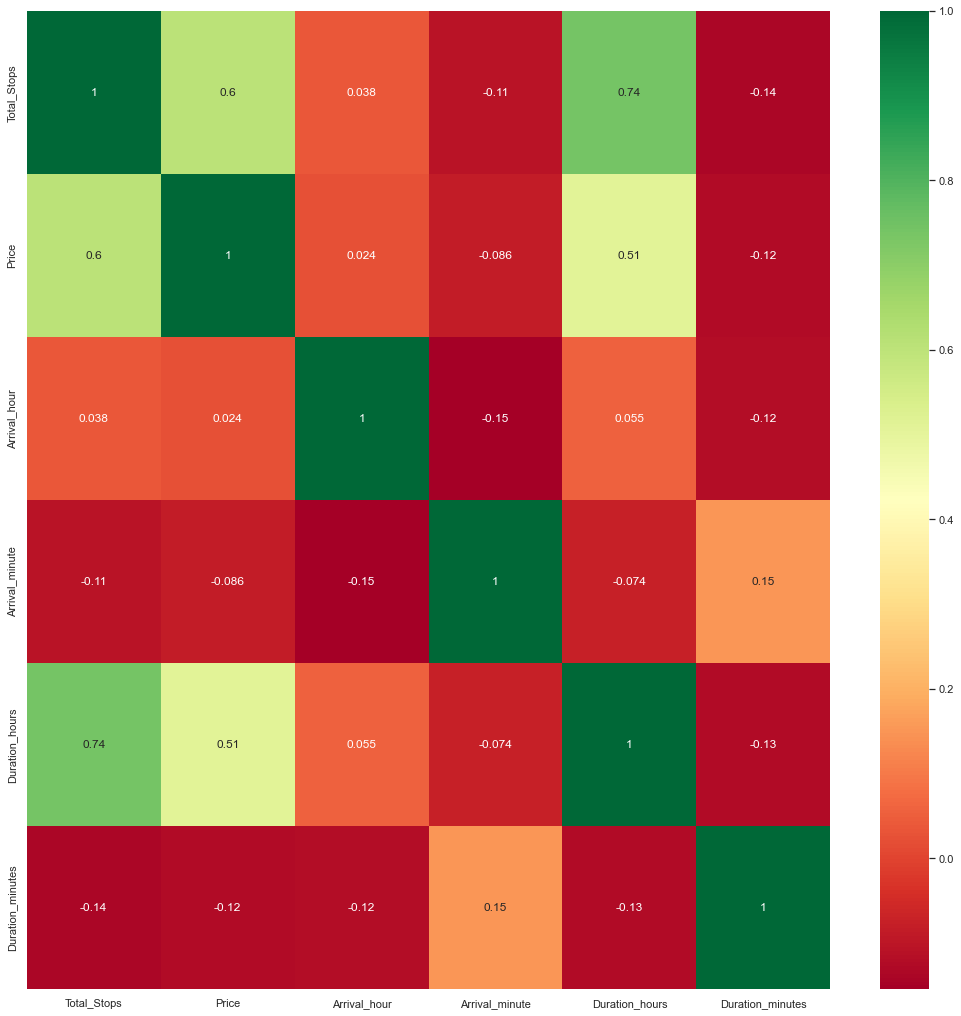

In [96]:
#find relation between independent and dependent attributes
#heatmap ************(learn it)

plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [27]:
X = train_data1.drop('Price',axis=1)
X.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,non-stop,No info,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,05:50,13:15,7h 25m,2 stops,No info,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,09:25,04:25 10 Jun,19h,2 stops,No info,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,18:05,23:30,5h 25m,1 stop,No info,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,16:50,21:35,4h 45m,1 stop,No info,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
y = train_data1['Price'].astype(int)
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int32

In [109]:
train_data1.Dep_Time.str.replace(':','.')

0        22.20
1        05.50
2        09.25
3        18.05
4        16.50
         ...  
10678    19.55
10679    20.45
10680    08.20
10681    11.30
10682    10.55
Name: Dep_Time, Length: 10682, dtype: object

In [28]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor

In [32]:
#extracting important features using 'ExtraTreesRegressor'

from sklearn.ensemble import ExtraTreesRegressor
select = ExtraTreesRegressor()
select.fit(X,y)

ValueError: could not convert string to float: '24/03/2019'

## Fitting Model Using Random Forest

1. Split data into train and test so as to predict w.r.t. 'X_test'.
2. If needed do scaling of data a) scaling is not done in Random Forest
3. Import the model(which suits the data most or gives better results)
4. Fit training data into it
5. Predict w.r.t. 'X_test' (compare with 'Y_test')
6. In regression models check RMSE score
7. Plot final graphs

In [114]:
#import 'train_test_split' 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [131]:
X_train.shape

(8545, 29)

In [132]:
Y_train.shape

(8545,)

In [125]:
#import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor
#abbrevate
RF_reg = RandomForestRegressor()
#fit training data into model
RF_reg.fit(X_train, y_train)

TypeError: The DTypes <class 'numpy.dtype[int64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [116]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [123]:
#import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor
#abbrevate
RF_reg = RandomForestRegressor()
#fit training data into model
RF_reg.fit(X_train, Y_train)

TypeError: The DTypes <class 'numpy.dtype[int64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [124]:
model.fit(X_train,y_train)

NameError: name 'model' is not defined

## Hyperparameter Tuning
1.  There are two ways of doing it: a) RandomizedSearchCV --> Fast b) GridSearchCV
2.    assign hyperparameters in form of dictionery
3.    Fit the model
4.   Check best paramters and best score


In [126]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [127]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [129]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


NameError: name 'rf' is not defined